<center><h2>Cross-correlation for Earthquakes at Honshu, Japan</h2></center>

<b><i>By Hongyi Su</i></b>     <i>  B.Eng.   B.Sc. </i>
<h6>Final Project for Undergraduate Internship Programm Summer 2020, Incorporated Research Institutions for Seismology</h6>

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/2/2a/SH-60B_helicopter_flies_over_Sendai.jpg/1920px-SH-60B_helicopter_flies_over_Sendai.jpg>

<i><center>An aerial view of tsunami damage in Tōhoku; [image retrieved from wikimedia.org]</center></i>



<img src="https://upload.wikimedia.org/wikipedia/commons/9/92/Map_of_Sendai_Earthquake_2011.jpg">

<i><center>Map of the epicenter of the Magitude 8.9 earthquake; [image retrieved from wikimedia.org]</center></i>


<i>"The 11 March 2011 magnitude 9.0 Honshu, Japan earthquake (38.322 N, 142.369 E, depth 32 km) generated a tsunami that was observed all over the Pacific region and caused tremendous devastation locally. As of 30 May 2011, the Japan National Police Agency reports 15,270 persons killed and 8,499 persons missing from the earthquake and tsunami. 115,433 residents are still staying at evacuation shelters."</i> (From International Tsunami Information Center)


__[More Details About This Earthquake](http://itic.ioc-unesco.org/index.php?option=com_content&view=article&id=1713&Itemid=2365&lang=en)__

<h1>Step One: Import Packages</h1>

In [12]:
from obspy import read
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
client = Client("IRIS")
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from obspy.signal.trigger import recursive_sta_lta
from obspy.signal.trigger import plot_trigger
from obspy.signal.trigger import trigger_onset
from obspy.signal.cross_correlation import correlation_detector

<h1>Step Two: Download Data</h1>

<table style="width:80%">
<tr>
<th><center>Event Summary</center></th>
<th><center>First Event</center></th>
<th><center>Second Event</center></th>
</tr>

<tr>
<td><center>Date/Time</center></td>
<td><center>2020-09-12 02:44:10 UTC</center></td>
<td><center>2011-03-11 05:46:23 UTC</center></td>
</tr>

<tr>
<td><center>Location</center></td>
<td><center>Near East Coast Of Honshu, Japan</center></td>
<td><center>Near East Coast Of Honshu, Japan</center></td>
</tr>

<tr>
<td><center>Magnitude</center></td>
<td><center>MW 6.1</center></td>
<td><center>MW 9.1</center></td>
</tr>

<tr>
<td><center>Latitude</center></td>
<td><center>38.7591° N</center></td>
<td><center>38.2963° N</center></td>
</tr>

<tr>
<td><center>Longitude</center></td>
<td><center>143.16° E</center></td>
<td><center>142.498° E</center></td>
</tr>

<tr>
<td><center>Depth</center></td>
<td><center>32.09 km</center></td>
<td><center>19.7 km</center></td>
</tr>


</table>

<h3>Select Stations</h3>

In [13]:
starttime = UTCDateTime(2020,9,12,2,44,0)
endtime = starttime + 60*60

<h3><hr>First Station Summary</h3></hr>
<ul>
<li><b>Network: IU</b></li>
<li><b>Station Code: YSS</b></li>
<li><b>Latitude: 46.96° N</b></li>    
<li><b>Longitude: 142.76° E</b></li>        
<li><b>Elevation: 	150 m</b></li>    
<li><b>Data Center: IRISDMC</b></li>        
</ul> 

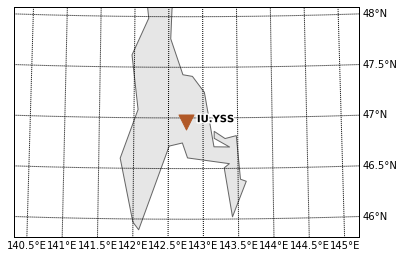

In [14]:
inv = client.get_stations(network="IU", station="YSS", channel="BHZ", level="channel", starttime=starttime, endtime=endtime, minlatitude="30", maxlatitude="50", minlongitude="130", maxlongitude="150")
inv.plot(projection = "local");

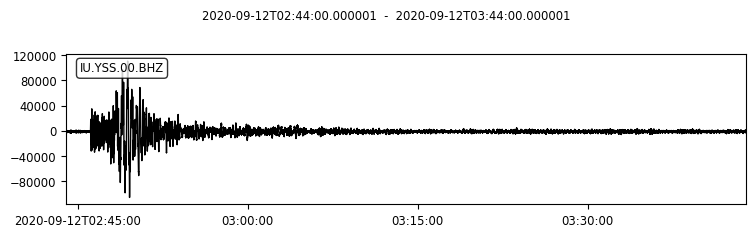

In [15]:
network="IU"
location="00"
station="YSS"
channel="BHZ"
stt = client.get_waveforms(network, station, location, channel, starttime, endtime)
stt.plot();

<h3><hr>Second Station Summary</h3></hr>
<ul>
<li><b>Network: II</b></li>
<li><b>Station Code: ERM</b></li>
<li><b>Latitude: 42.02° N</b></li>    
<li><b>Longitude: 143.16° E</b></li>        
<li><b>Elevation: 	40 m</b></li>    
<li><b>Data Center: IRISDMC</b></li>        
</ul> 

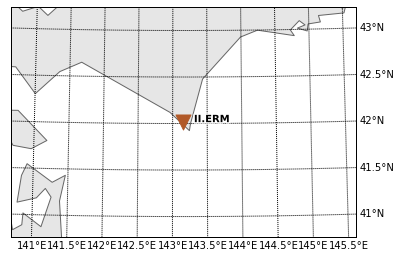

In [16]:
inv = client.get_stations(network="II", station="ERM", channel="BHZ", level="channel", starttime=starttime, endtime=endtime, minlatitude="30", maxlatitude="50", minlongitude="130", maxlongitude="150")
inv.plot(projection = "local");

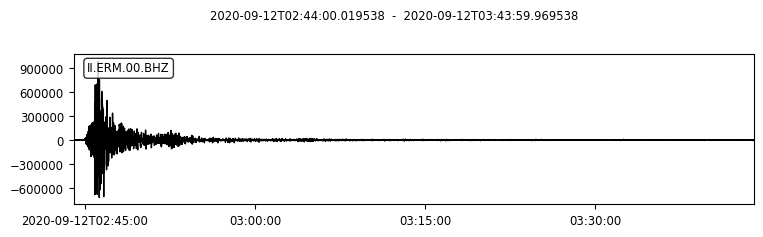

In [17]:
network="II"
location="00"
station="ERM"
channel="BHZ"
st = client.get_waveforms(network, station, location, channel, starttime, endtime)
st.plot();

<h1>Step Three: Decide the Cross-correlation Window</h1>

In [18]:
#filtering 
st.filter('bandpass', freqmin=0.5, freqmax=3);
tr=st[0]
print(tr.stats);

               network: II
               station: ERM
              location: 00
               channel: BHZ
             starttime: 2020-09-12T02:44:00.019538Z
               endtime: 2020-09-12T03:43:59.969538Z
         sampling_rate: 20.0
                 delta: 0.05
                  npts: 72000
                 calib: 1.0
_fdsnws_dataselect_url: http://service.iris.edu/fdsnws/dataselect/1/query
               _format: MSEED
                 mseed: AttribDict({'dataquality': 'M', 'number_of_records': 31, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 126976})
            processing: ['ObsPy 1.2.2: trim(endtime=UTCDateTime(2020, 9, 12, 3, 44, 0, 19538)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2020, 9, 12, 2, 44, 0, 19538))', "ObsPy 1.2.2: filter(options={'freqmin': 0.5, 'freqmax': 3}::type='bandpass')"]


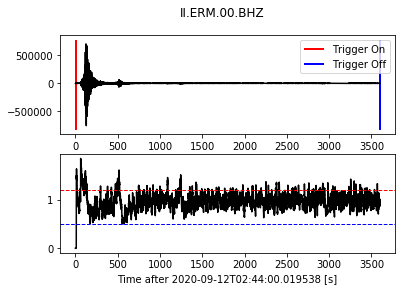

In [19]:
#lta-sta auto-picking
samprate = tr.stats.sampling_rate;
cf = recursive_sta_lta(tr, int(5*samprate), int(10*samprate));
fig = plot_trigger(tr, cf, 1.2, 0.5);

In [20]:
trig = trigger_onset(cf, 1.2, 0.5)/samprate
arrival = trig[0][0]
pick = tr.stats.starttime + arrival
print(pick)

2020-09-12T02:44:10.019538Z


In [21]:
#correct the P-arrival time; data from http://ds.iris.edu/wilber3/find_stations/11309089
pick = UTCDateTime(2020,9,12,2,44,59) 
st = client.get_waveforms(network, station, location, channel, starttime, endtime)
st.trim(pick - 10, pick + 190);

<blockquote><b>Second Event</b></blockquote>

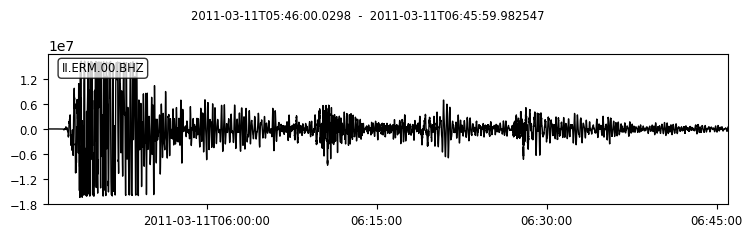

In [22]:
starttime2 = UTCDateTime(2011,3,11,5,46,0)
endtime2 = starttime2 + 60*60
st2 = client.get_waveforms(network, station, location, channel, starttime2, endtime2)
st2.plot();

In [23]:
st2.filter('bandpass', freqmin=0.5, freqmax=5);
tr2=st2[0]
print(tr2.stats);

               network: II
               station: ERM
              location: 00
               channel: BHZ
             starttime: 2011-03-11T05:46:00.029800Z
               endtime: 2011-03-11T06:45:59.982547Z
         sampling_rate: 19.999984741210938
                 delta: 0.05000003814700176
                  npts: 72000
                 calib: 1.0
_fdsnws_dataselect_url: http://service.iris.edu/fdsnws/dataselect/1/query
               _format: MSEED
                 mseed: AttribDict({'dataquality': 'M', 'number_of_records': 59, 'encoding': 'STEIM1', 'byteorder': '>', 'record_length': 4096, 'filesize': 241664})
            processing: ['ObsPy 1.2.2: trim(endtime=UTCDateTime(2011, 3, 11, 6, 45, 59, 982547)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2011, 3, 11, 5, 45, 59, 979800))', "ObsPy 1.2.2: filter(options={'freqmin': 0.5, 'freqmax': 5}::type='bandpass')"]


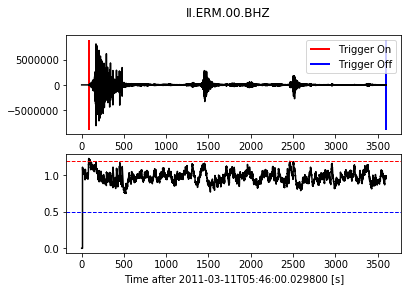

In [24]:
cf = recursive_sta_lta(tr2, int(8*samprate), int(10*samprate));
fig = plot_trigger(tr2, cf, 1.2, 0.5);

In [25]:
trig2 = trigger_onset(cf, 1.2, 0.5)/samprate
arrival2 = trig2[0][0]
pick2 = tr2.stats.starttime+arrival2
print(pick2)

2011-03-11T05:47:22.279800Z


In [26]:
#correct the P-arrival time; data from http://ds.iris.edu/wilber3/find_stations/3279407
pick2 = UTCDateTime(2011,3,11,5,47,19) 
st2 = client.get_waveforms(network, station, location, channel, starttime2, endtime2)
st2.trim(pick2 - 10, pick2 + 190);

<h1>Step Four: Perform Cross-correlation</h1>

/Users/hongyisu/anaconda3/lib/python3.7/site-packages/obspy/signal/cross_correlation.py:1196: UserWarning: Traces have different sampling rate -> do not use template 0
  warnings.warn(msg)


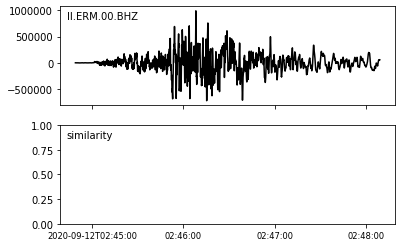

In [27]:
detections, sims = correlation_detector(st, st2, 0.1, 10, plot = st);

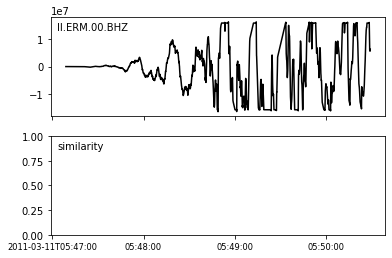

In [28]:
detections, sims = correlation_detector(st, st2, 0.1, 10, plot = st2);

In [29]:
pick3 = UTCDateTime(2020,9,12,2,46,6)   #2020-09-12 02:46:06
stt = client.get_waveforms(network, station, location, channel, starttime, endtime)
stt.trim(pick3 - 10, pick3 + 190);

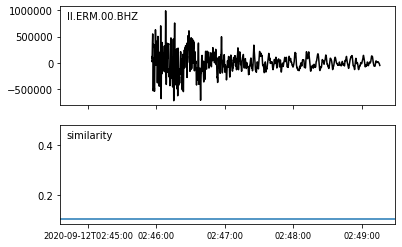

In [31]:
detections, sims = correlation_detector(st, stt, 0.1, 10, plot = stt);

<h1>Conclusion</h1>

In order to figure out if the two events are similar, future investigation is needed.